**HOW NOT TO LOOSE CUSTOMER IN 10 DAYS ??..**

In [1]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/HACKER EARTH/hackerearth-machine-learning-challenge-predict-customer-churn/98efc33085a711eb.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')


finish


In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [167]:
train=pd.read_csv("/content/dataset/train.csv")
test=pd.read_csv("/content/dataset/test.csv")
sub=pd.read_csv("/content/dataset/sample_submission.csv")

In [168]:
train[:5]

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [169]:
# set target feature
targetFeature='churn_risk_score'

**EDA**

In [170]:
def datashape(df):
  rows,columns=df.shape
  print("The dataset contains ",rows,"rows and",columns,"columns.")

In [171]:
# segregate numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [172]:
datashape(train)

The dataset contains  36992 rows and 25 columns.


In [173]:
# remove ID from training data
train.drop(['customer_id'], inplace=True, axis=1)

In [174]:
# check for duplicates
print(train.shape)
train.drop_duplicates(inplace=True)
print(train.shape)

(36992, 24)
(36992, 24)


In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [176]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19919 non-null  object 
 4   security_no                   19919 non-null  object 
 5   region_category               16971 non-null  object 
 6   membership_category           19919 non-null  object 
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       19919 non-null  object 
 9   referral_id                   19919 non-null  object 
 10  preferred_offer_types         19760 non-null  object 
 11  medium_of_operation           19919 non-null  object 
 12  internet_option               19919 non-null  object 
 13  l

In [177]:
train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [178]:
continuous_data, categorical_data = divideFeatures(train)

In [179]:
categorical_data

,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,Pattie Morrisey,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17.0,Yes,Yes,No,Not Applicable,Products always in Stock
1,Traci Peery,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,10.0,Yes,No,Yes,Solved,Quality Customer Care
2,Merideth Mcmeen,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,22.0,No,Yes,Yes,Solved in Follow-up,Poor Website
3,Eufemia Cardwell,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,6.0,No,Yes,Yes,Unsolved,Poor Website
4,Meghan Kosak,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,16.0,No,Yes,Yes,Solved,Poor Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,Cuc Tarr,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,04:14:05,6.0,No,Yes,Yes,No Information Available,No reason specified
36988,Jenni Stronach,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,23:18:31,28.0,Yes,No,No,Not Applicable,Poor Customer Service
36989,Luciana Kinch,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,Wi-Fi,03:50:25,Error,No,Yes,Yes,Unsolved,Poor Website
36990,Tawana Ardoin,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,Mobile_Data,09:50:03,20.0,Yes,Yes,No,Not Applicable,No reason specified


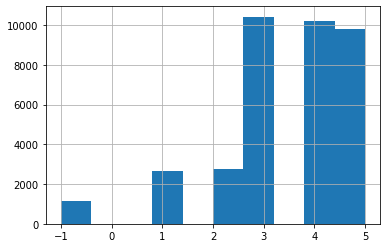

In [180]:
# check target feature distribution
train[targetFeature].hist()
plt.show()

In [181]:
for col in categorical_data:
    print(f'{col} : {categorical_data[col].unique()}')

Name : ['Pattie Morrisey' 'Traci Peery' 'Merideth Mcmeen' ... 'Luciana Kinch'
 'Tawana Ardoin' 'Verlene Beaulieu']
gender : ['F' 'M' 'Unknown']
security_no : ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']
region_category : ['Village' 'City' 'Town' nan]
membership_category : ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']
joining_date : ['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']
joined_through_referral : ['No' '?' 'Yes']
referral_id : ['xxxxxxxx' 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']
preferred_offer_types : ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
medium_of_operation : ['?' 'Desktop' 'Smartphone' 'Both']
internet_option : ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']
last_visit_time : ['16:08:02' '12:38:13' '22:53:21' ... '04:14:05' '09:50:03' '01:39:52']
avg_frequency_login_days : ['17.0' '10.0' '22.0' ... '-9

In [182]:
for col in continuous_data:
    print(f'{col} : {continuous_data[col].unique()}')

age : [18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 48 43 29 10
 20 61 17 12 52 26 49 24 22 36 58 41 50 23 38 35 28 53 55 59 47 54 62 51
 56 27 14 46 15 64 63]
days_since_last_login : [  17   16   14   11   20   23   10   19   15   13 -999    5   12    9
   21   18    1   22    4    8    3    6    2   24    7   26   25]
avg_time_spent : [ 300.63       306.34       516.16      ... -638.1234208  154.94
  482.61     ]
avg_transaction_value : [53005.25 12838.38 21027.   ... 38127.56  2378.86  2189.68]
points_in_wallet : [781.75                nan 500.69       ... 242.97962545 639.51
 197.26441364]
churn_risk_score : [ 2  1  5  3  4 -1]


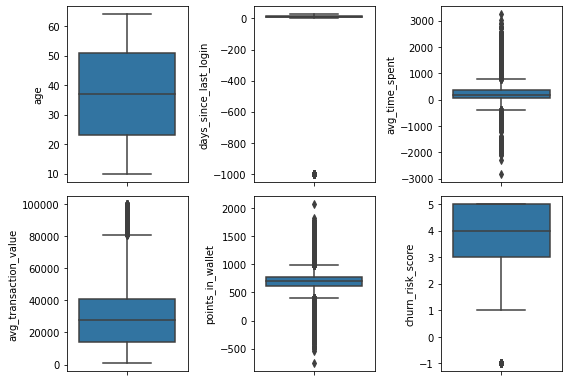

In [183]:
# boxplots of numerical features for outlier detection
import seaborn as sns
fig = plt.figure(figsize=(8,8))
for i in range(len(continuous_data.columns)):
    fig.add_subplot(3, 3, i+1)
    sns.boxplot(y=continuous_data.iloc[:,i])
plt.tight_layout()
plt.show()

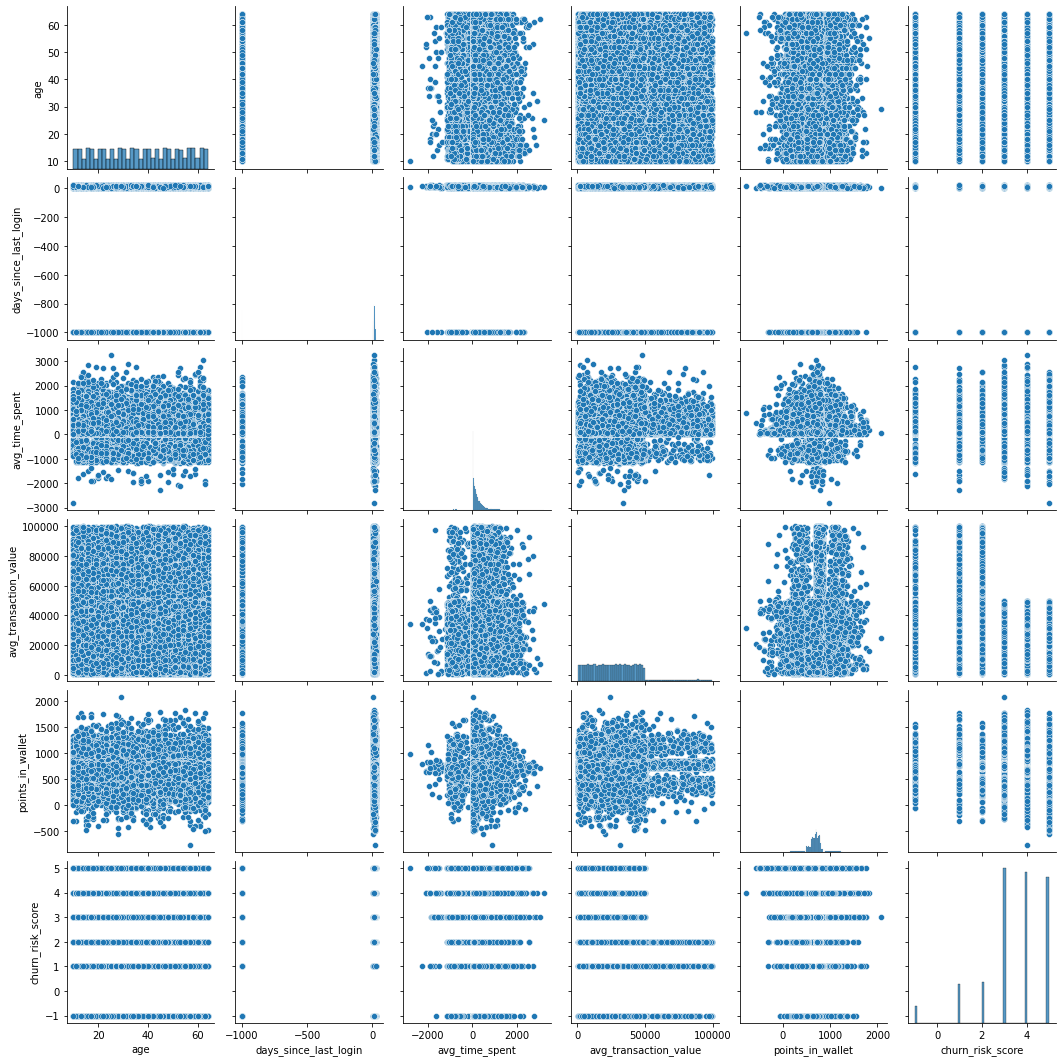

In [184]:
sns.pairplot(train)
plt.show()

In [185]:
skewed_features = continuous_data.apply(lambda x: x.skew()).sort_values(ascending=False)
skewed_features

avg_transaction_value    1.011027
avg_time_spent           0.539624
age                     -0.007319
points_in_wallet        -0.080309
churn_risk_score        -1.114305
days_since_last_login   -3.941356
dtype: float64

In [186]:
 miss = train.isna().sum().sort_values(ascending=False)

In [187]:
miss

region_category                 5428
points_in_wallet                3443
preferred_offer_types            288
churn_risk_score                   0
medium_of_operation                0
age                                0
gender                             0
security_no                        0
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
internet_option                    0
feedback                           0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
Name                               0
dtype: int64

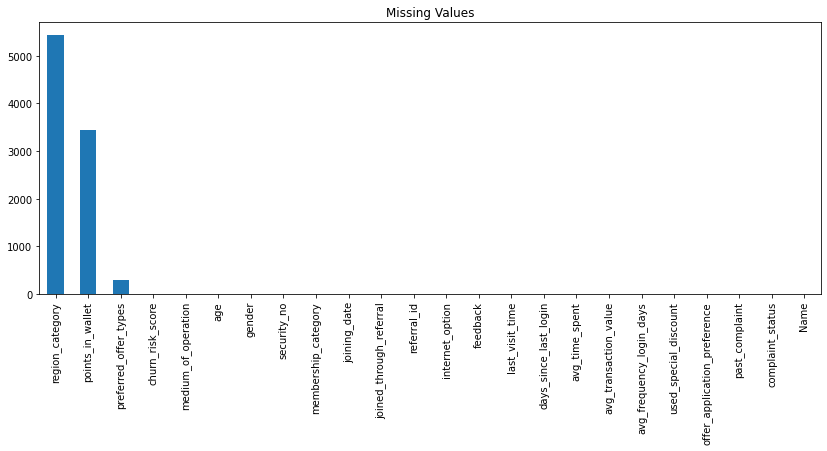

In [188]:
miss.plot(kind='bar',figsize=(14,5))
plt.title('Missing Values')
plt.show()

In [189]:
 miss_t = test.isna().sum().sort_values(ascending=False)

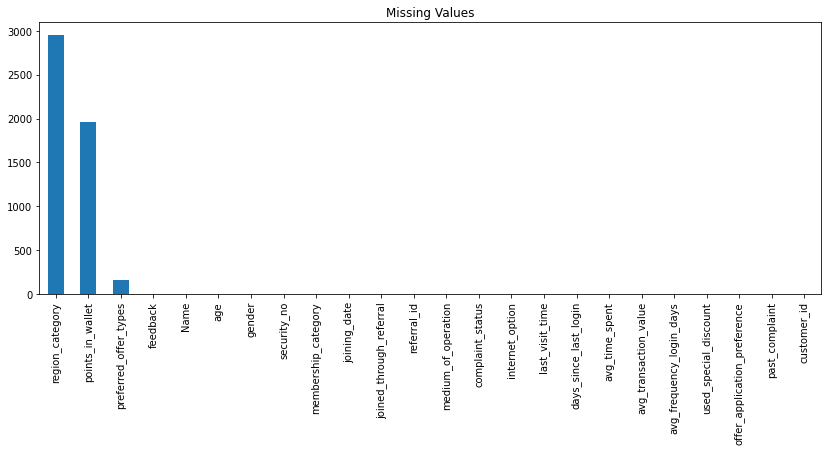

In [190]:
miss_t.plot(kind='bar',figsize=(14,5))
plt.title('Missing Values')
plt.show()

In [191]:
#remove all columns having no values
train.dropna(axis=1, how="all", inplace=True)
train.dropna(axis=0, how="all", inplace=True)
datashape(train)

The dataset contains  36992 rows and 24 columns.


In [192]:
def fillNanValues(df, col, value):
    df[col].fillna(value, inplace=True)

In [193]:
fillNanValues(train, 'region_category', train['region_category'].mode()[0])
fillNanValues(test, 'region_category', test['region_category'].mode()[0])
print(train['region_category'].isna().any())#any returns boolean values
print(test['region_category'].isna().any())

False
False


In [194]:

fillNanValues(train, 'points_in_wallet', train['points_in_wallet'].mean())
fillNanValues(test, 'points_in_wallet', test['points_in_wallet'].mean())
print(train['points_in_wallet'].isna().any())#any returns boolean values
print(test['points_in_wallet'].isna().any())

False
False


In [195]:

fillNanValues(train, 'preferred_offer_types', train['preferred_offer_types'].mode()[0])
fillNanValues(test, 'preferred_offer_types', test['preferred_offer_types'].mode()[0])
print(train['preferred_offer_types'].isna().any())#any returns boolean values
print(test['preferred_offer_types'].isna().any())

False
False


**Data Modelling**

In [196]:
# setting missing values to most occurring values
train['joined_through_referral'] = train['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)
test['joined_through_referral'] = test['joined_through_referral'].apply(lambda x:'No' if x == '?' else x)
train['joined_through_referral'].unique()

array(['No', 'Yes'], dtype=object)

In [197]:
# setting missing values to most occurring values
train['medium_of_operation'] = train['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)
test['medium_of_operation'] = test['medium_of_operation'].apply(lambda x:'Desktop' if x == '?' else x)
train['medium_of_operation'].unique()

array(['Desktop', 'Smartphone', 'Both'], dtype=object)

In [198]:
# setting target wrong value -1 to 1 assuming sign issue, 
# and setting 5 to 0 for training after prediction revert it back to 5
train['churn_risk_score'] = train['churn_risk_score'].apply(lambda x:1 if x == -1 else 0 if x == 5 else x)
train['churn_risk_score'].unique()

array([2, 1, 0, 3, 4])

In [199]:
train['avg_frequency_login_days'].unique()

array(['17.0', '10.0', '22.0', ..., '-9.32551114210603',
       '-8.759329712785977', '27.8399274405269'], dtype=object)

In [200]:
# setting missing values to most occurring values
train['avg_frequency_login_days'] = train['avg_frequency_login_days'].apply(lambda x:0 if x == 'Error' else x)
test['avg_frequency_login_days'] = test['avg_frequency_login_days'].apply(lambda x:0 if x == 'Error' else x)
train['avg_frequency_login_days'] = pd.to_numeric(train['avg_frequency_login_days'])
train['avg_frequency_login_days'].describe()

count    36992.000000
mean        14.455576
std          9.941579
min        -43.652702
25%          7.000000
50%         14.000000
75%         22.000000
max         73.061995
Name: avg_frequency_login_days, dtype: float64

In [201]:
test['avg_frequency_login_days'] = pd.to_numeric(test['avg_frequency_login_days'])

In [202]:
# remove non-useful features
colsToRemove = ['Name', 'security_no', 'referral_id', 'last_visit_time']
train.drop(colsToRemove, inplace=True, axis=1)
test.drop(colsToRemove, inplace=True, axis=1)
train.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,0
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,0
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,0


In [203]:
train.shape

(36992, 20)

In [204]:
test.shape

(19919, 20)

In [205]:
print("Train Missing:",train.isna().any().sum())
print("Test Missing:",test.isna().any().sum())

Train Missing: 0
Test Missing: 0


In [206]:
train['joining_date'] = pd.to_datetime(train['joining_date'])
test['joining_date'] = pd.to_datetime(test['joining_date'])

In [207]:
train['days_since_joined'] = train['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)
test['days_since_joined'] = test['joining_date'].apply(lambda x:(pd.Timestamp('today') - x).days)
train.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_joined
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2,1337
1,32,F,City,Premium Membership,2017-08-28,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1,1326
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,0,1616
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,0,1629
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,0,1311


In [208]:
train.drop(['joining_date'], inplace=True, axis=1)
test.drop(['joining_date'], inplace=True, axis=1)
train.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_joined
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Desktop,Wi-Fi,17,300.63,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2,1337
1,32,F,City,Premium Membership,No,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,686.882199,Yes,No,Yes,Solved,Quality Customer Care,1,1326
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,0,1616
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,0,1629
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,0,1311


In [209]:
# segregate numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [210]:
continuous_data, categorical_data = divideFeatures(train)

In [211]:
from sklearn.preprocessing import LabelEncoder

In [212]:
le = LabelEncoder()
label_columns=categorical_data.columns

for label_column in label_columns:
    train[label_column] = le.fit_transform(train[label_column])

In [213]:
train[:5]

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,days_since_joined
0,18,0,2,3,0,1,1,2,17,300.63,53005.25,17.0,781.750000,1,1,0,1,4,2,1337
1,32,0,0,4,0,1,1,1,16,306.34,12838.38,10.0,686.882199,1,0,1,2,5,1,1326
2,44,0,1,2,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,1,3,3,0,1616
3,37,1,0,2,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,1,4,3,0,1629
4,31,0,0,2,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,1,2,3,0,1311


In [214]:
train.shape

(36992, 20)

In [215]:
test_df=test.drop(['customer_id'],axis=1)

In [216]:
continuous_data_t, categorical_data_t = divideFeatures(test_df)

In [217]:
categorical_data_t[:5]

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,Village,Premium Membership,No,Without Offers,Smartphone,Wi-Fi,Yes,No,No,Not Applicable,Poor Product Quality
1,M,Village,Gold Membership,No,Without Offers,Desktop,Fiber_Optic,Yes,No,No,Not Applicable,Poor Website
2,F,Town,Silver Membership,No,Gift Vouchers/Coupons,Both,Mobile_Data,Yes,No,Yes,Solved in Follow-up,No reason specified
3,M,Town,Silver Membership,Yes,Credit/Debit Card Offers,Desktop,Fiber_Optic,Yes,No,Yes,No Information Available,Too many ads
4,F,Town,No Membership,Yes,Without Offers,Smartphone,Mobile_Data,No,Yes,Yes,Solved in Follow-up,Poor Website


In [218]:
le = LabelEncoder()
label_columns=categorical_data_t.columns

for label_column in label_columns:
    test_df[label_column] = le.fit_transform(test_df[label_column])

In [219]:
test_df[:5]

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,days_since_joined
0,50,0,2,4,0,2,2,2,12,386.26,40721.44,7.0,733.830000,1,0,0,1,2,1991
1,41,1,2,1,0,2,1,0,11,37.80,9644.40,9.0,726.000000,1,0,0,1,3,1871
2,31,0,1,5,0,1,0,1,18,215.36,3693.25,21.0,713.780000,1,0,1,3,0,1504
3,64,1,1,5,1,0,1,0,-999,44.57,36809.56,11.0,744.970000,1,0,1,0,7,1336
4,16,0,1,2,1,2,2,1,6,349.88,40675.86,8.0,299.048351,0,1,1,3,3,2172


In [220]:
X=train.drop(['churn_risk_score'], axis=1)
y=train['churn_risk_score']

In [221]:
X[:5]

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,days_since_joined
0,18,0,2,3,0,1,1,2,17,300.63,53005.25,17.0,781.750000,1,1,0,1,4,1337
1,32,0,0,4,0,1,1,1,16,306.34,12838.38,10.0,686.882199,1,0,1,2,5,1326
2,44,0,1,2,1,1,1,2,14,516.16,21027.00,22.0,500.690000,0,1,1,3,3,1616
3,37,1,0,2,1,1,1,1,11,53.27,25239.56,6.0,567.660000,0,1,1,4,3,1629
4,31,0,0,2,0,0,2,1,20,113.13,24483.66,16.0,663.060000,0,1,1,2,3,1311


In [222]:
y

0        2
1        1
2        0
3        0
4        0
        ..
36987    4
36988    0
36989    4
36990    3
36991    2
Name: churn_risk_score, Length: 36992, dtype: int64

**Model Building**

In [223]:
# split into train dev and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=30)

In [224]:
continuous_data.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,days_since_joined
0,18,17,300.63,53005.25,17.0,781.750000,2,1337
1,32,16,306.34,12838.38,10.0,686.882199,1,1326
2,44,14,516.16,21027.00,22.0,500.690000,0,1616
3,37,11,53.27,25239.56,6.0,567.660000,0,1629
4,31,20,113.13,24483.66,16.0,663.060000,0,1311


In [225]:
import sklearn.preprocessing as pre
# scaler = pre.RobustScaler()
# scaler = pre.MinMaxScaler()
scaler = pre.StandardScaler()

# apply scaling to all numerical variables except dummy variables as they are already between 0 and 1
X_train= pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

#scale test data with transform()
X_test= pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_cv_scaled= scaler.transform(X_test)
X_test_scaled = scaler.transform(test_df)
'''
#new_test= pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)
# view sample data
#X_train.describe()
X_train.head()
print(X_train.shape,X_test.shape)

(31443, 19) (5549, 19)


In [226]:
import sklearn.utils as skutils
class_weights = skutils.class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.7529454022988505,
 1: 1.9548026111283805,
 2: 2.7270598438855163,
 3: 0.7067430883344572,
 4: 0.7253287197231834}

In [227]:
print(X_train.isna().sum())
print("__________________________________________")
print(X_test.isna().sum())


age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
days_since_joined               0
dtype: int64
__________________________________________
age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login     

In [147]:
!pip install catboost

In [148]:
 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import catboost as cb
import xgboost as xgb
import lightgbm as lgb 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error,accuracy_score,f1_score

In [149]:
models=[cb.CatBoostClassifier(verbose=0, iterations=100),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(random_state=0, n_estimators=100),xgb.XGBClassifier(n_estimators = 400),lgb.LGBMClassifier(objective='multi', random_state=1, n_jobs=-1,learning_rate=0.15, n_estimators=100)]
model_names=['CatBoost Classifier','Randomforest Classifier','Kneighbors Classifier','DecisionTreeClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier','LGBM Classifier']
rmse=[]
accuracy=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmse.append(np.sqrt(mean_squared_error(test_pred,y_test)))
    accuracy.append(clf.score(X_test,y_test))
d={'Modelling Algo':model_names,'RMSE':rmse,"Accuracy":accuracy}  

In [150]:
data_model = pd.DataFrame(d)

In [151]:
data_model

,Modelling Algo,RMSE,Accuracy
0,CatBoost Classifier,1.505382,0.755992
1,Randomforest Classifier,1.498603,0.754010
2,Kneighbors Classifier,2.046143,0.441521
3,DecisionTreeClassifier,1.605429,0.703550
4,GradientBoostingClassifier,1.445097,0.765183
5,AdaBoostClassifier,1.986937,0.199676
6,XGBClassifier,1.500045,0.752027
7,LGBM Classifier,1.485801,0.758155


In [152]:
def printScore(y_train, y_train_pred):
    print(f1_score(y_train, y_train_pred, average="macro"))

In [153]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(objective='multi', random_state=1, n_jobs=-1, 
                               learning_rate=0.15, 
                               n_estimators=400)
lgb_model.fit(X_train, y_train)

# predict
y_train_pred = lgb_model.predict(X_train)
y_test_pred = lgb_model.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.9918900868237763
0.7509461164173725
0.9914817697997617
0.7373121818461461


In [443]:
lgb_p = lgb_model.predict(test_df)


In [444]:
rmslg=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [445]:
rmslg

1.521259890001071

In [373]:
sub.head()

,customer_id,churn_risk_score
0,fffe4300490044003600300030003800,2
1,fffe43004900440032003100300035003700,1
2,fffe4300490044003100390032003600,5
3,fffe43004900440036003000330031003600,5
4,fffe43004900440031003900350030003600,5


In [446]:
submmitted_data = pd.DataFrame()

In [447]:
submmitted_data['customer_id'] = test['customer_id']
submmitted_data['churn_risk_score'] =lgb_p

In [448]:
submmitted_data


,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,3
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,4
...,...,...
19914,fffe43004900440035003600330037003800,3
19915,fffe43004900440032003900370037003100,0
19916,fffe43004900440036003100310036003700,0
19917,fffe43004900440034003200330033003600,4


In [449]:
submmitted_data.to_csv("lgb-5.csv",index=False)

In [441]:
submission = pd.DataFrame({
        "customer_id": test["customer_id"],
        "churn_risk_score": lgb_p
    })

# revert back 0 to 5 for predictions
submission[targetFeature] = submission[targetFeature].apply(lambda x:5 if x == 0 else x)
submission[targetFeature].value_counts()

5    5769
4    5559
3    5538
1    1770
2    1283
Name: churn_risk_score, dtype: int64

In [442]:
submission.to_csv("lgb-4.csv",index=False)

**Trying Implementing with Models**

**XGB Classifier**

In [417]:
xgb_model = xgb.XGBClassifier(n_estimators=500)
xgb_model.fit(X_train, y_train)

# predict
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.8361436826276484
0.7653736991485336
0.8287903842357665
0.7452955315616443


In [418]:
rmsgxb=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [419]:
rmsgxb

1.4603837296834157

In [400]:
XGB_p = xgb_model.predict(test_df)


In [401]:
submission = pd.DataFrame({
        "customer_id": test["customer_id"],
        "churn_risk_score": XGB_p
    })

# revert back 0 to 5 for predictions
submission[targetFeature] = submission[targetFeature].apply(lambda x:5 if x == 0 else x)
submission[targetFeature].value_counts()

5    6978
3    5694
4    4348
1    1871
2    1028
Name: churn_risk_score, dtype: int64

In [402]:
submission.to_csv("XGB-1.csv",index=False)

In [390]:
GB_model = GradientBoostingClassifier(random_state=23,
                             n_estimators=100)
GB_model.fit(X_train, y_train)

# predict
y_train_pred = GB_model.predict(X_train)
y_test_pred = GB_model.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.7914033724191532
0.7640221651574537
0.7734110414366723
0.7420794275841072


In [391]:
rms=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [392]:
rms

1.463757779162566

In [393]:
GB_p = GB_model.predict(test_df)


In [394]:
submission = pd.DataFrame({
        "customer_id": test["customer_id"],
        "churn_risk_score": GB_p
    })

# revert back 0 to 5 for predictions
submission[targetFeature] = submission[targetFeature].apply(lambda x:5 if x == 0 else x)
submission[targetFeature].value_counts()

5    6967
3    5642
4    4288
1    2052
2     970
Name: churn_risk_score, dtype: int64

In [395]:
submission.to_csv("GB-1.csv",index=False)

In [430]:

cat_model = cb.CatBoostClassifier(verbose=0, iterations=700,  
                                  class_weights=class_weights, 
                                 )
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))
print(cat_model.best_score_)

y_train_pred = cat_model.predict(X_train)
y_test_pred = cat_model.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

{'learn': {'MultiClass': 0.3173713371245724}, 'validation': {'MultiClass': 0.5636984061984707}}
0.8015409049437366
0.7534802000270306
0.7998134116669087
0.7219314589743513


In [431]:
rmscat=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [432]:
rmscat

1.469103342299463

**Stacking Classifier Gives me LeaderBoard rank 57**

In [73]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import StackingClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [74]:
from sklearn.model_selection import cross_val_score


In [228]:
'''
cat_model = cb.CatBoostClassifier(verbose=0, iterations=700,  
                                  class_weights=class_weights, 
                                 )
GB_model = GradientBoostingClassifier(random_state=23,
                             n_estimators=100)
xgb_model = xgb.XGBClassifier(n_estimators=500)

lgb_model = lgb.LGBMClassifier(objective='multi', random_state=1, n_jobs=-1, 
                               learning_rate=0.15, 
                               n_estimators=400)
'''


estimators = [('GB', GradientBoostingClassifier()),('XGB', xgb.XGBClassifier()),('lgbm',lgb.LGBMClassifier())]
clf = StackingClassifier(estimators=estimators, final_estimator=cb.CatBoostClassifier())
clf.fit(X_train, y_train).score(X_test, y_test)


Learning rate set to 0.09434
0:	learn: 1.3843105	total: 42.7ms	remaining: 42.7s
1:	learn: 1.2308330	total: 87.6ms	remaining: 43.7s
2:	learn: 1.1173096	total: 132ms	remaining: 43.7s
3:	learn: 1.0250957	total: 174ms	remaining: 43.3s
4:	learn: 0.9497945	total: 224ms	remaining: 44.6s
5:	learn: 0.8871737	total: 269ms	remaining: 44.5s
6:	learn: 0.8340590	total: 313ms	remaining: 44.4s
7:	learn: 0.7887122	total: 360ms	remaining: 44.7s
8:	learn: 0.7507824	total: 403ms	remaining: 44.4s
9:	learn: 0.7173158	total: 456ms	remaining: 45.2s
10:	learn: 0.6884078	total: 501ms	remaining: 45s
11:	learn: 0.6634498	total: 544ms	remaining: 44.8s
12:	learn: 0.6416194	total: 588ms	remaining: 44.6s
13:	learn: 0.6217256	total: 633ms	remaining: 44.6s
14:	learn: 0.6046409	total: 680ms	remaining: 44.7s
15:	learn: 0.5894613	total: 734ms	remaining: 45.1s
16:	learn: 0.5754895	total: 784ms	remaining: 45.4s
17:	learn: 0.5635835	total: 830ms	remaining: 45.3s
18:	learn: 0.5529216	total: 873ms	remaining: 45.1s
19:	learn: 0

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7635610019823391

In [229]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7625862672136883
0.7635610019823391
0.7460692816869477
0.7480508489944017


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [230]:
rmsstacked=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [231]:
rmsstacked

1.4647907092652863

In [232]:
new_test= pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)

In [233]:
clf_p = clf.predict(new_test)#


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [234]:
submission = pd.DataFrame({
        "customer_id": test["customer_id"],
        "churn_risk_score": clf_p
    })

# revert back 0 to 5 for predictions
submission[targetFeature] = submission[targetFeature].apply(lambda x:5 if x == 0 else x)
submission[targetFeature].value_counts()

5    6076
3    5619
4    5211
1    1789
2    1224
Name: churn_risk_score, dtype: int64

In [235]:
submission.to_csv("stacked_-8.csv",index=False)

In [578]:
from sklearn.ensemble import ExtraTreesClassifier

In [579]:
extclf=ExtraTreesClassifier(n_estimators=200,criterion='gini')
extclf.fit(X_train, y_train).score(X_test, y_test)

0.7048249763481551

In [580]:
y_train_pred = extclf.predict(X_train)
y_test_pred = extclf.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

1.0
0.7048249763481551
1.0
0.6631911181199726


In [581]:
rmsext=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [582]:
rmsext

1.5735343249063023

**Trying Voting classifier...**

In [585]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier
#estimators = [('GB', GradientBoostingClassifier()),('XGB', xgb.XGBClassifier()),('lgbm',lgb.LGBMClassifier())]
estimators = [('GB', GradientBoostingClassifier(random_state=21)),('XGB', xgb.XGBClassifier(random_state=21)),
              ('CB',cb.CatBoostClassifier(loss_function='MultiClass',random_state=21)),
              ('lgbm',lgb.LGBMClassifier(random_state=21))]

clf=VotingClassifier(estimators=estimators,n_jobs=-1,voting='soft')

output = cross_validate(clf,X,y,n_jobs=-1, cv=10, scoring = 'neg_log_loss', return_estimator =True,return_train_score=True)

In [587]:
output

{'estimator': (VotingClassifier(estimators=[('GB',
                                GradientBoostingClassifier(ccp_alpha=0.0,
                                                           criterion='friedman_mse',
                                                           init=None,
                                                           learning_rate=0.1,
                                                           loss='deviance',
                                                           max_depth=3,
                                                           max_features=None,
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
       

In [591]:
clf.fit(X_train, y_train).score(X_test, y_test)

0.7622651709690499

In [592]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_test_pred))
printScore(y_train, y_train_pred)
printScore(y_test, y_test_pred)

0.8690230797823809
0.7622651709690499
0.8621800528603233
0.74471840321656


In [593]:
rmsvoting=(np.sqrt(mean_squared_error(y_test_pred,y_test)))

In [594]:
rmsvoting

1.4748419594125846

In [595]:
clfVoting_p = clf.predict(test_df)


In [596]:
submission = pd.DataFrame({
        "customer_id": test["customer_id"],
        "churn_risk_score": clfVoting_p
    })

# revert back 0 to 5 for predictions
submission[targetFeature] = submission[targetFeature].apply(lambda x:5 if x == 0 else x)
submission[targetFeature].value_counts()

5    6850
3    5634
4    4422
1    2005
2    1008
Name: churn_risk_score, dtype: int64

In [597]:
submission.to_csv("voting_-1.csv",index=False)

**Trying Hyperparametr tunning on XGB classifier model...**

In [237]:
import sklearn
from sklearn.model_selection import RandomizedSearchCV
import time


In [239]:
clf_xgb = xgb.XGBClassifier()


param_grid = {
    'learning_rate': np.arange(0.05, 0.31, 0.05),
    'subsample': np.arange(0.3, 1, 0.1),
    'colsample_bytree': np.arange(0.3, 1, 0.1),
    'colsample_bylevel': np.arange(0.3, 1, 0.1),
    'max_depth': np.arange(5, 16, 1, dtype=int),
    'min_child_weight': np.arange(1, 10, 1, dtype=int),
    'reg_alpha': np.arange(0.1, 1, 0.1),
    'reg_lambda': np.arange(1, 5, 0.5),
    'gamma': np.arange(0.1, 2, 0.1),
    'n_estimators': np.arange(100, 3000, 100, dtype=int),
}

fit_params = {
    'eval_metric': 'mlogloss',
    'early_stopping_rounds': 10,
    'eval_set': [(X_test, y_test)],
    'verbose': False
}

# https://stats.stackexchange.com/questions/431022/error-while-performing-multiclass-classification-using-gridsearch-cv
multiclass_scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score, average = 'weighted')

rs_clf = RandomizedSearchCV(clf_xgb,
                            param_grid,
                            n_iter=50,
                            n_jobs=-1,
                            verbose=2,
                            scoring=multiclass_scorer,
                            random_state=42)

print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train, **fit_params)
print("Randomized search time:", time.time() - search_time_start)

best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Randomized search..
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 29.2min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 48.4min finished


Randomized search time: 2921.6545288562775
Best score: 0.7552015266814511
Best params: 
colsample_bylevel: 0.7000000000000002
colsample_bytree: 0.4
gamma: 1.5000000000000002
learning_rate: 0.15000000000000002
max_depth: 8
min_child_weight: 1
n_estimators: 2300
reg_alpha: 0.30000000000000004
reg_lambda: 3.0
subsample: 0.6000000000000001


In [240]:
xgb_hyper_p = rs_clf.predict(new_test)

In [241]:
submission = pd.DataFrame({
        "customer_id": test["customer_id"],
        "churn_risk_score": xgb_hyper_p
    })

# revert back 0 to 5 for predictions
submission[targetFeature] = submission[targetFeature].apply(lambda x:5 if x == 0 else x)
submission[targetFeature].value_counts()

5    6283
3    5481
4    5098
1    1954
2    1103
Name: churn_risk_score, dtype: int64

In [242]:
submission.to_csv("xgb_hyper-2.csv",index=False)